<a href="https://colab.research.google.com/github/Seshmanuvarthi/DAV_190/blob/main/DAV_190.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving cricket_data_2025.csv to cricket_data_2025.csv


Here's a sneak peek at our clean data:
     Year  Player_Name  Matches_Batted  Not_Outs  Runs_Scored Highest_Score  \
0  2024.0  Abdul Samad            16.0       2.0        182.0           37*   
1  2023.0  Abdul Samad             9.0       4.0        169.0           37*   
2  2022.0  Abdul Samad             2.0       0.0          4.0             4   
3  2021.0  Abdul Samad            11.0       1.0        111.0            28   
4  2020.0  Abdul Samad            12.0       3.0        111.0            33   

   Batting_Average  Balls_Faced  Batting_Strike_Rate  Centuries  ...  \
0            18.20        108.0               168.52        0.0  ...   
1            42.25        128.0               132.03        0.0  ...   
2             2.00          7.0                57.14        0.0  ...   
3            12.33         87.0               127.58        0.0  ...   
4            22.20         65.0               170.76        0.0  ...   

   Balls_Bowled  Runs_Conceded  Wickets_Taken  Bowlin

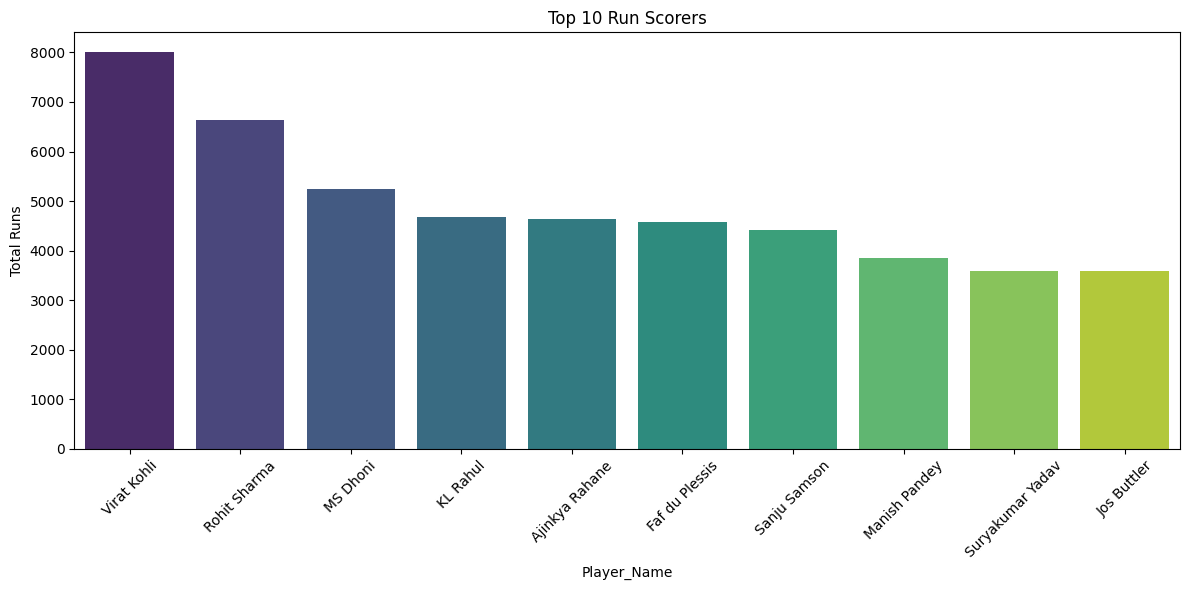

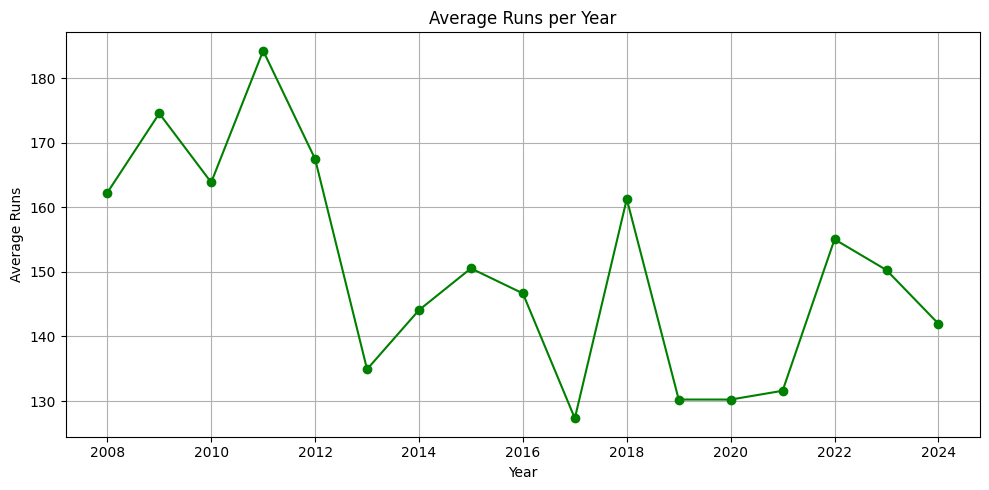

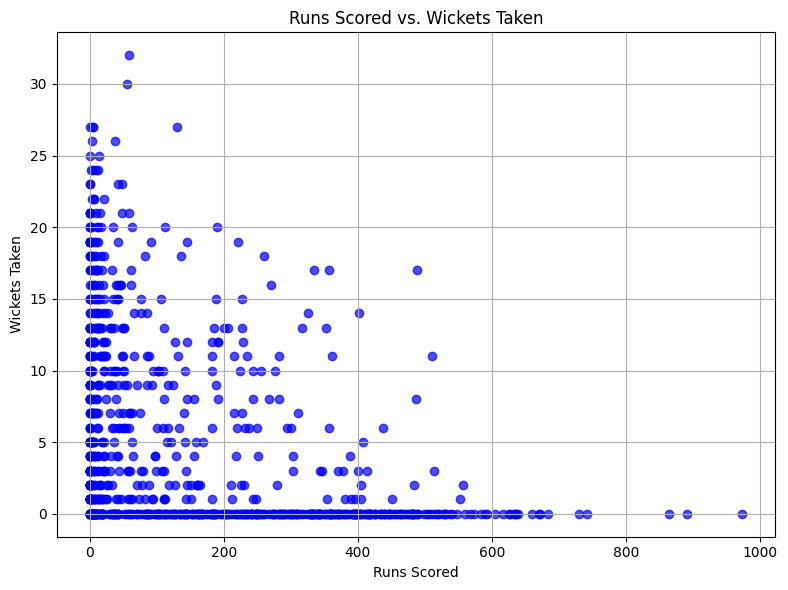

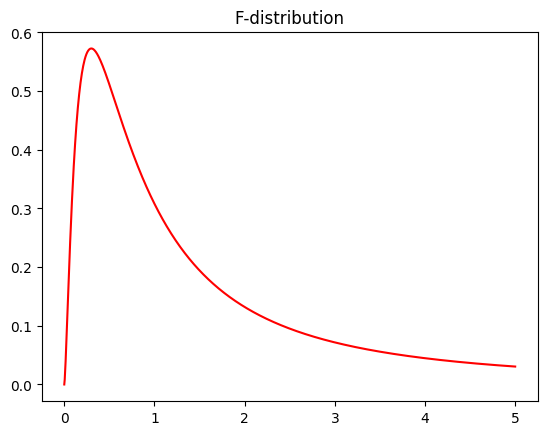

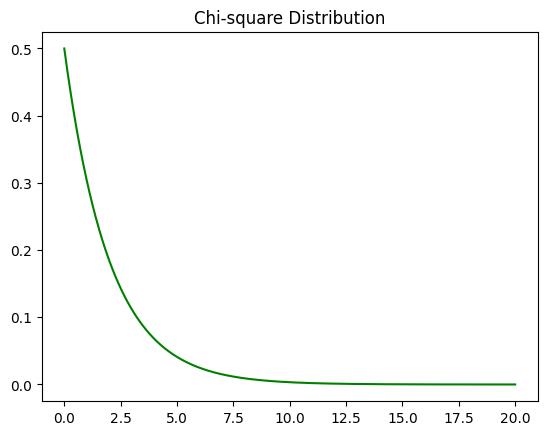

ANOVA Test Result: F=0.43, p=0.6511




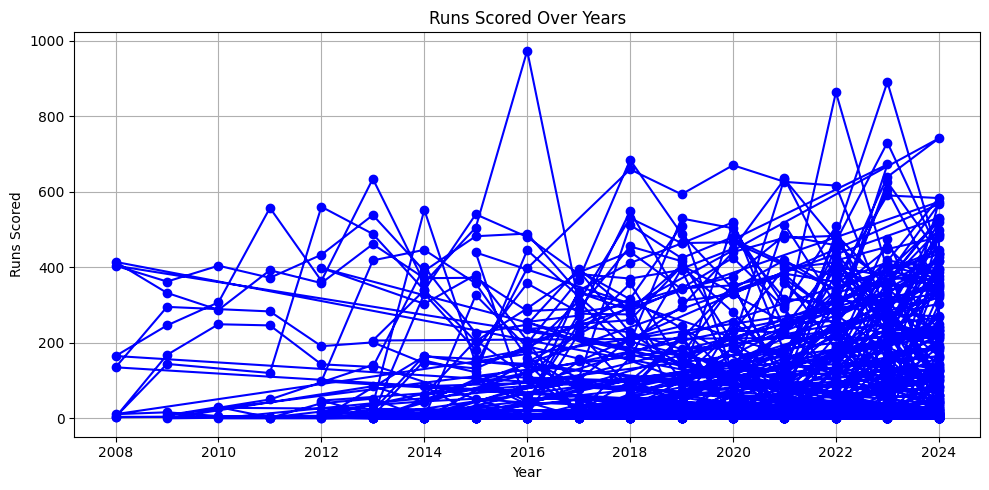

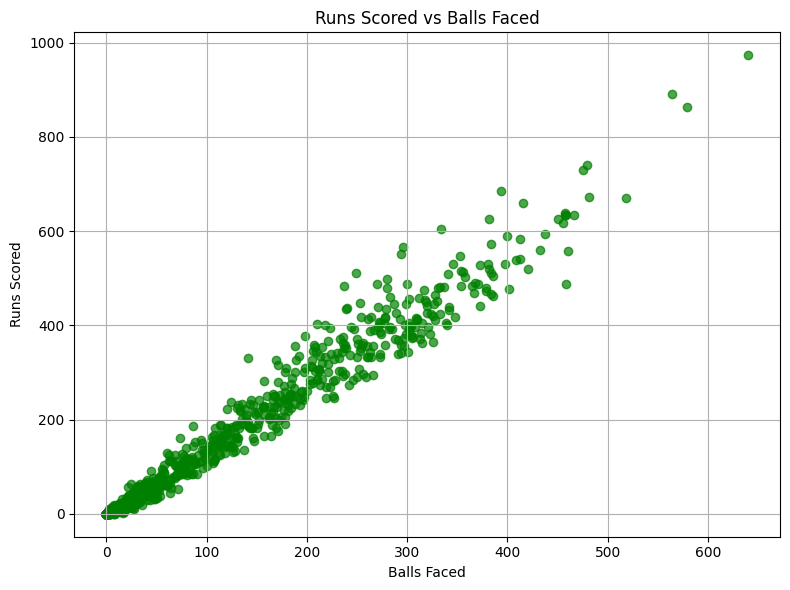

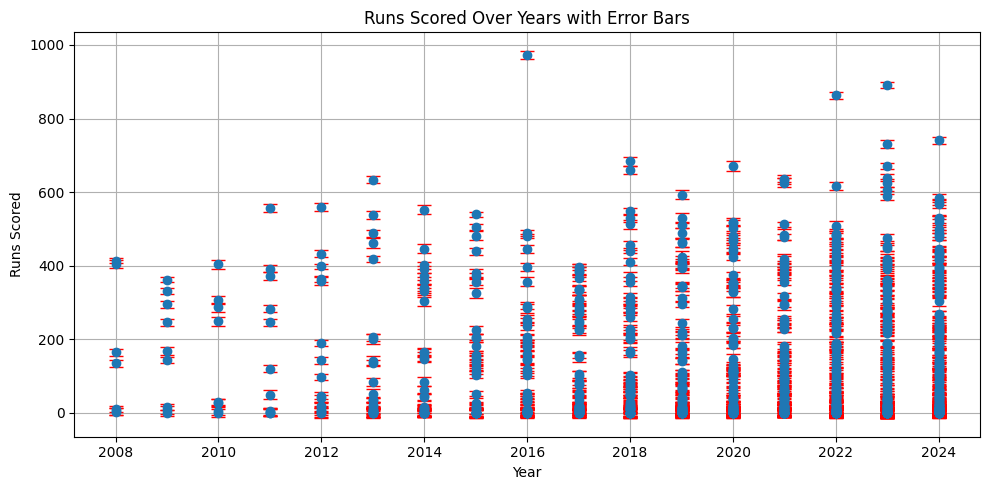

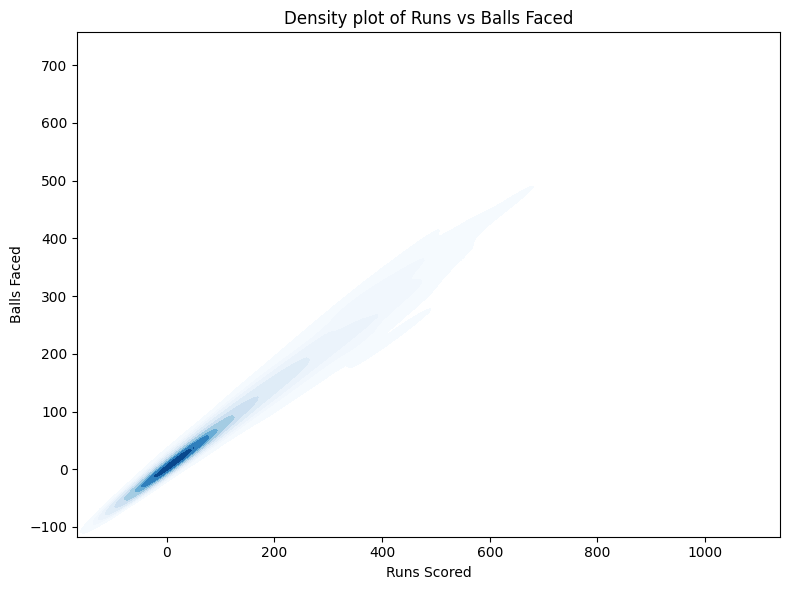

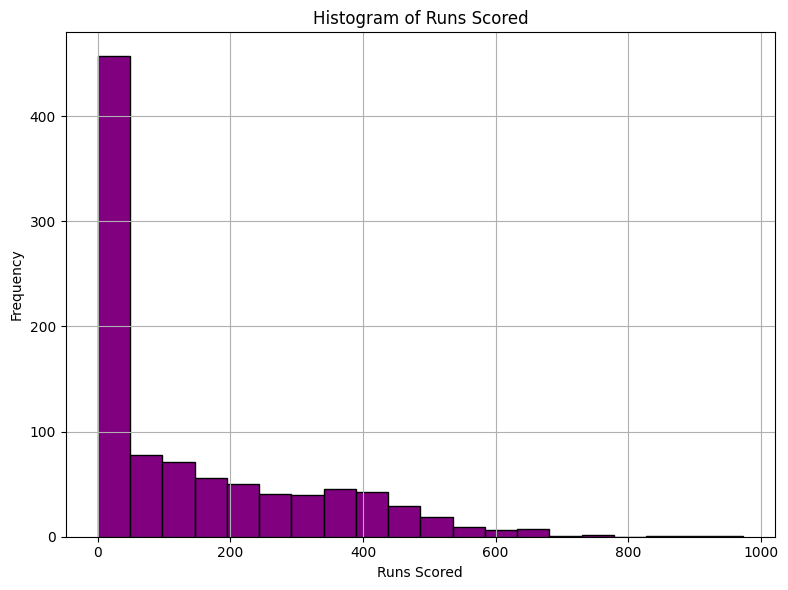

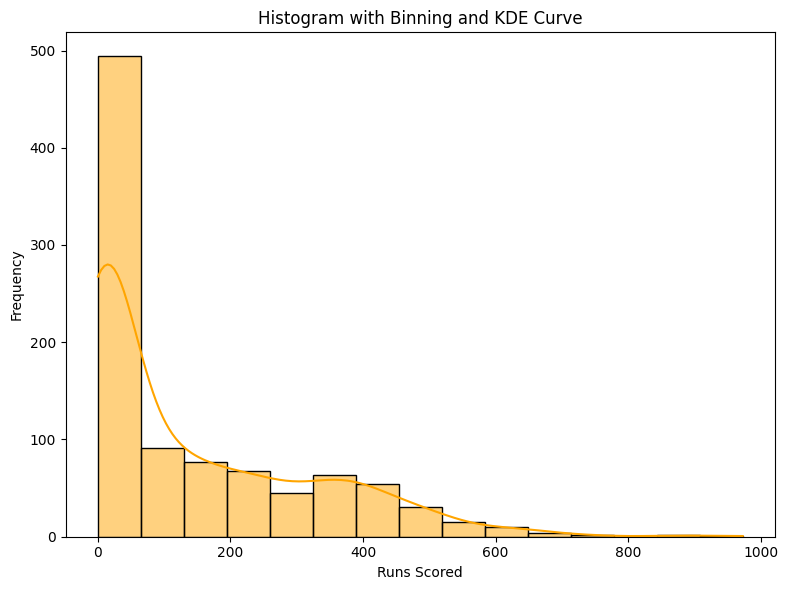

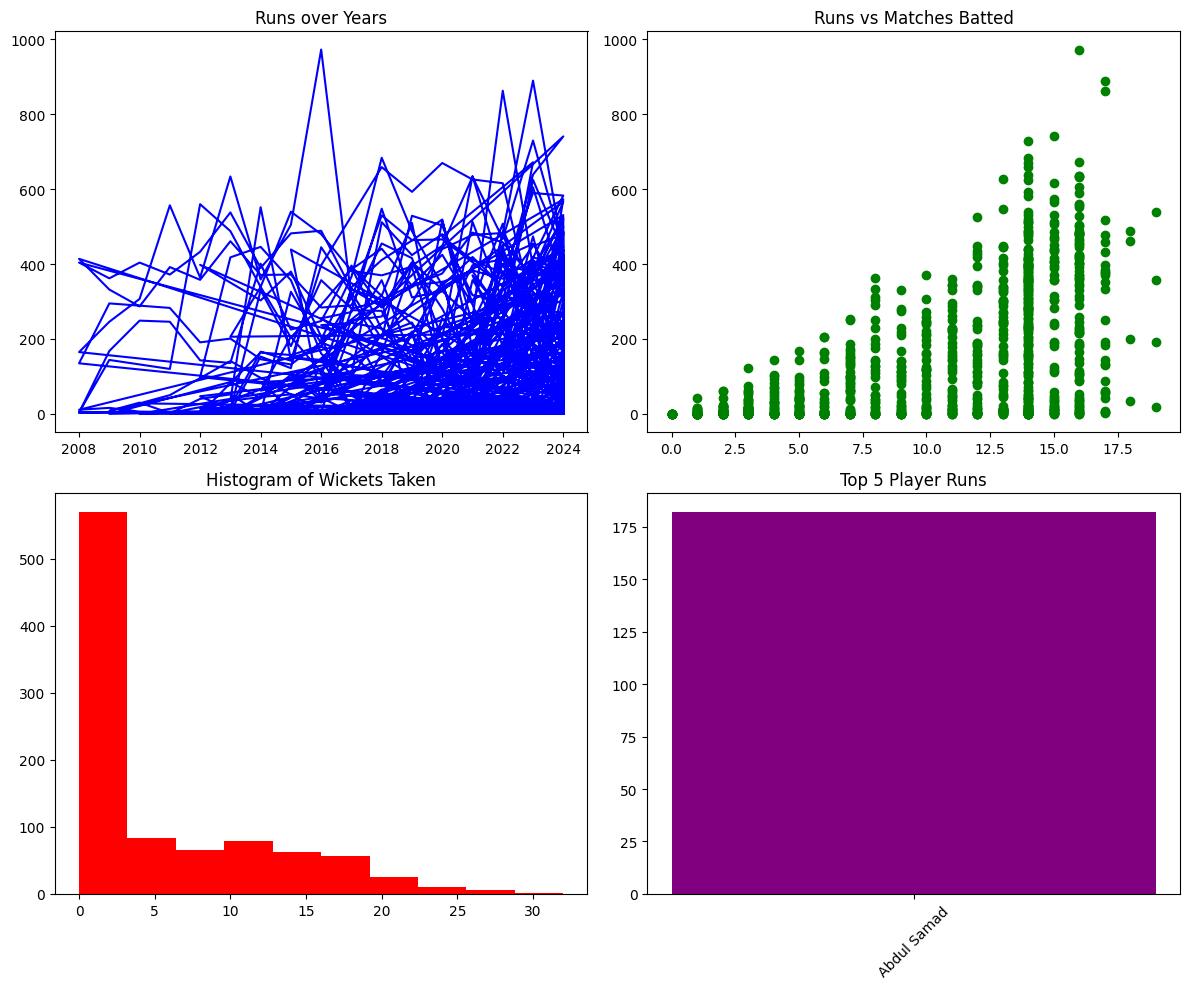

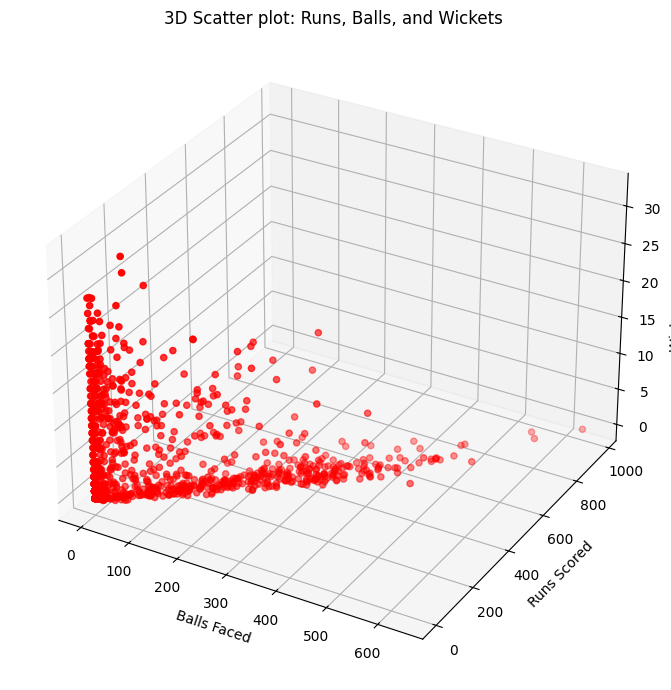

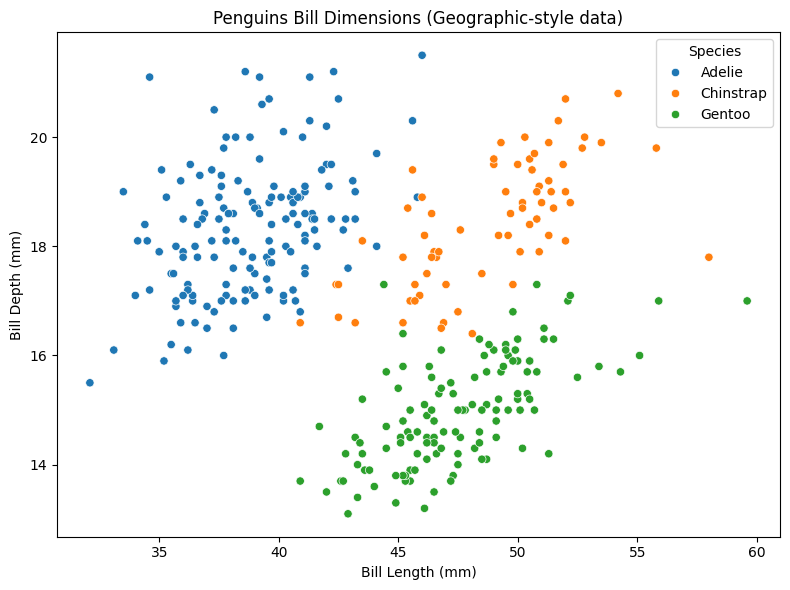

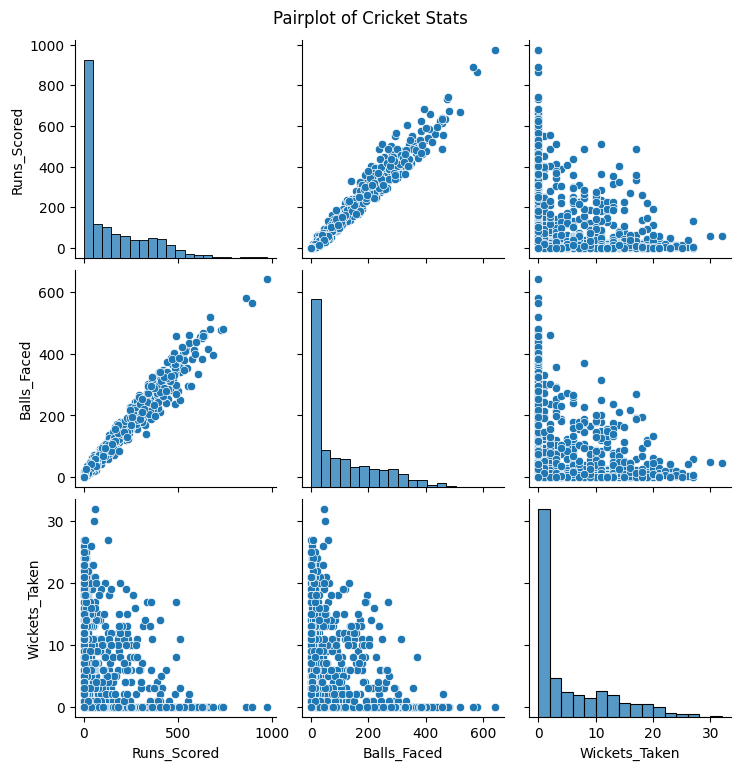

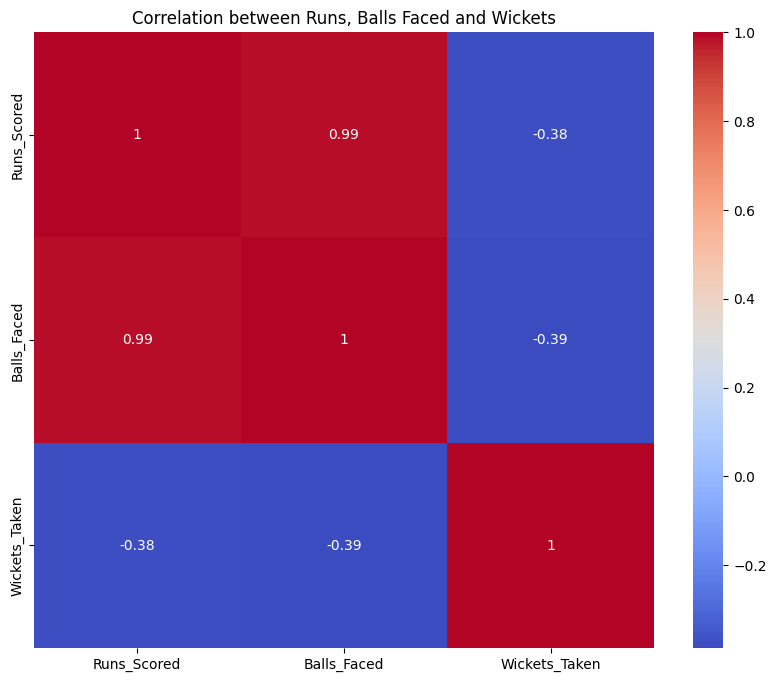

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f
from scipy.stats import chi2
from scipy.stats import f_oneway # Import the f_oneway function


# Let's start by grabbing our cricket data from the file.
try:
    df = pd.read_csv('cricket_data_2025.csv')  # Replace with your file name
except FileNotFoundError:
    print("Hey, I couldn't find 'cricket_data_2025.csv'. Make sure it's in the same folder as this code!")
    exit()

# Sometimes, the data has "No stats" instead of blanks. Let's fix that.
df = df.replace("No stats", np.nan)

# We want to make sure all the numbers are actually treated as numbers.
numeric_cols = ['Year', 'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Balls_Faced',
                'Batting_Average', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries',
                'Fours', 'Sixes', 'Catches_Taken', 'Stumpings', 'Matches_Bowled',
                'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken', 'Bowling_Average',
                'Economy_Rate', 'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') # if something is not a number, it will be NaN

# The 'Best_Bowling_Match' column had two stats together. Let's split them.
df[['Best_Bowling_Wickets', 'Best_Bowling_Runs']] = df['Best_Bowling_Match'].str.split('/', expand=True)
df['Best_Bowling_Wickets'] = pd.to_numeric(df['Best_Bowling_Wickets'], errors='coerce')
df['Best_Bowling_Runs'] = pd.to_numeric(df['Best_Bowling_Runs'], errors='coerce')
df = df.drop('Best_Bowling_Match', axis=1) # We don't need the old column anymore.

# We only care about rows with years, so let's drop the others.
df = df.dropna(subset=['Year'])

# If there are any missing values, let's fill them with zeros.
df = df.fillna(0)

# Reset the index, so it's nice and tidy.
df = df.reset_index(drop=True)

print("Here's a sneak peek at our clean data:")
print(df.head())
print('\n')

# --- NumPy: Our Array Helper ---

print("Let's use NumPy to do some number crunching!")

# We'll turn some of our columns into NumPy arrays.
try:
    years = np.array(df['Year'])
    runs_scored = np.array(df['Runs_Scored'])
    wickets_taken = np.array(df['Wickets_Taken'])
except KeyError as e:
    print(f"Oops! I couldn't find the column '{e}'. Double-check the column names!")
    exit()

print("Years:", years[:5])
print("Runs Scored:", runs_scored[:5])
print("Wickets Taken:", wickets_taken[:5])
print("\n")

# Some simple array operations:
print("First Year:", years[0])
print("Third Runs Scored:", runs_scored[2])
print("\n")

print("First 3 Wicket counts:", wickets_taken[:3])
print("Years from index 2 to 5:", years[2:6])
print("\n")

reshaped_runs = runs_scored.reshape((len(runs_scored), 1))
print("Runs Scored as a column:", reshaped_runs[:5])
print("\n")

array_concat = np.concatenate((years[:5], [2025, 2026]))
print("Years with a few extra:", array_concat)

split_index = int(len(years) / 2)
array_split = np.split(years, [split_index])
print("First half of years:", array_split[0][:5])
print("Second half of years:", array_split[1][:5])
print("\n")

squared_runs = np.square(runs_scored)
print("Squared Runs:", squared_runs[:5])
print("\n")

print("Average Runs Scored:", np.mean(runs_scored))
print("Most Wickets Taken:", np.max(wickets_taken))
print("\n")

print("Runs Scored plus 10:", runs_scored[:5] + 10)
print("\n")

print("Wickets over 15?:", wickets_taken[:10] > 15)
print("\n")

print("Years with many wickets:", years[wickets_taken > 15][:10])
print("\n")

print("Runs at specific spots:", runs_scored[[0, 5, 10]])
print("\n")

print("Sorted Runs:", np.sort(runs_scored)[:5])

indices_sorted_by_wickets = np.argsort(wickets_taken)
print("Order of wickets:", indices_sorted_by_wickets[:5])
print("Wickets in order:", wickets_taken[indices_sorted_by_wickets[:5]])
print("\n")

indices_of_smallest_wickets = np.argpartition(wickets_taken, 5)[:5]
print("Indices of 5 lowest wickets:", indices_of_smallest_wickets)
print("5 lowest wickets:", wickets_taken[indices_of_smallest_wickets])
print("\n")

structured_array = np.zeros(5, dtype={'names': ('player_name', 'year'), 'formats': ('U50', 'i4')})
structured_array['player_name'] = df['Player_Name'][:5]
structured_array['year'] = df['Year'][:5]
print("Player names and years together:", structured_array)
print("\n")

record_array = structured_array.view(np.recarray)
print("Just the years from that array:", record_array.year)
print("\n")

# --- Pandas: Our Data Organizer ---

print("Now let's use Pandas to work with our data in a more organized way.")

player_series = pd.Series(df['Player_Name'])
print("First few player names:", player_series.head())
print("\n")

print("DataFrame info:")
df.info()
print("\n")

print("First player name:", player_series[0])
print("Players 2 to 4:", player_series[2:5])
print("\n")

print("Players and Runs:", df[['Player_Name', 'Runs_Scored']].head())
print("\n")
print("Row at index 1:", df.loc[1])
print("\n")

try:
    print("Batting average at index 3:", df.iloc[3, df.columns.get_loc('Batting_Average')])
    print("\n")
except KeyError:
    print("Looks like I couldn't find 'Batting_Average'.")

player_with_prefix = player_series.map(lambda name: "Player: " + name)
print("Players with 'Player:' in front:", player_with_prefix.head())
print("\n")

try:
    run_series = pd.Series(df['Runs_Scored'], index=df['Player_Name'])
    batting_avg_series = pd.Series(df['Batting_Average'], index=df['Player_Name'])
    runs_plus_avg = run_series + batting_avg_series
    print("Runs plus batting averages:", runs_plus_avg.head())
    print("\n")
except KeyError:
    print("Couldn't add runs and averages. Check the column names.")

print("Missing values in each column:")
print(df.isnull().sum())
print("\n")

hierarchical_index = df.set_index(['Player_Name', 'Year'])
print("Data with player names and years as labels:", hierarchical_index.head())
print("\n")

# --- Combining Datasets ---

print("Let's combine some data!")

data2 = {'Player_Name': ['Abdul Samad', 'Abhinav Manohar', 'Adam Zampa'],
         'Favorite Shot': ['Sweep', 'Cover Drive', 'Googly']}
df2 = pd.DataFrame(data2)
print("Favorite shots data:", df2)
print("\n")

concatenated_df = pd.concat([df.head(3), df2], ignore_index=True)
print("Combined data:", concatenated_df)
print("\n")

appended_df = pd.concat([df.head(3), df2], ignore_index=True) #Corrected append to pd.concat
print("Appended data:", appended_df)
print("\n")

merged_df = pd.merge(df, df2, on='Player_Name', how='left')
print("Merged data:", merged_df.head())
print("\n")

try:
    average_runs_by_year = df.groupby('Year')['Runs_Scored'].mean()
    print("Average runs per year:", average_runs_by_year)
    print("\n")
except KeyError:
    print("Couldn't group by year. Check the column name.")

try:
    pivot_table = pd.pivot_table(df, values='Runs_Scored', index='Year', columns='Player_Name', aggfunc='mean')
    print("Runs by year and player:", pivot_table.head())
except KeyError:
    print("Couldn't make the pivot table. Check the column names.")

# --- Data Visualization ---

print("Let's visualize some of this cricket data!")

# Bar plot: Top 10 run scorers
top_players = df.groupby('Player_Name')['Runs_Scored'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_players.index, y=top_players.values, hue=top_players.index, palette='viridis', legend=False)
plt.title("Top 10 Run Scorers")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line plot: Average runs scored per year
plt.figure(figsize=(10, 5))
average_runs_by_year.plot(kind='line', marker='o', color='green')
plt.title("Average Runs per Year")
plt.xlabel("Year")
plt.ylabel("Average Runs")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot: Runs vs Wickets
plt.figure(figsize=(8, 6))
plt.scatter(df['Runs_Scored'], df['Wickets_Taken'], alpha=0.7, color='blue')
plt.title("Runs Scored vs. Wickets Taken")
plt.xlabel("Runs Scored")
plt.ylabel("Wickets Taken")
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Z-test vs T-test
# (Here, T-test is shown; for Z-test, large sample assumed)

# 9. F-distribution
x_f = np.linspace(0, 5, 1000)
y_f = f.pdf(x_f, dfn=5, dfd=2)
plt.plot(x_f, y_f, 'r-', label='F-distribution')
plt.title('F-distribution')
plt.show()

# 10. Chi-square Distribution
x_chi = np.linspace(0, 20, 1000)
y_chi = chi2.pdf(x_chi, df=2)
plt.plot(x_chi, y_chi, 'g-', label='Chi-square Distribution')
plt.title('Chi-square Distribution')
plt.show()

# 11. Chi-square Test of Independence
# Using Titanic dataset later

# 12. ANOVA (One-way)
group1 = df[df['Year'] <= 2015]['Runs_Scored']
group2 = df[(df['Year'] > 2015) & (df['Year'] <= 2020)]['Runs_Scored']
group3 = df[df['Year'] > 2020]['Runs_Scored']

anova_result = f_oneway(group1, group2, group3)
print(f"ANOVA Test Result: F={anova_result.statistic:.2f}, p={anova_result.pvalue:.4f}")
print("\n")


# --- Simple Line Plot ---
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Runs_Scored'], marker='o', linestyle='-', color='blue')
plt.title("Runs Scored Over Years")
plt.xlabel("Year")
plt.ylabel("Runs Scored")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Scatter Plot ---
plt.figure(figsize=(8, 6))
plt.scatter(df['Balls_Faced'], df['Runs_Scored'], alpha=0.7, color='green')
plt.title("Runs Scored vs Balls Faced")
plt.xlabel("Balls Faced")
plt.ylabel("Runs Scored")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Visualizing Errors (Error Bars) ---
# Random small errors added just for visualization
errors = np.random.normal(10, 2, size=len(df['Year']))
plt.figure(figsize=(10, 5))
plt.errorbar(df['Year'], df['Runs_Scored'], yerr=errors, fmt='o', ecolor='red', capsize=5)
plt.title("Runs Scored Over Years with Error Bars")
plt.xlabel("Year")
plt.ylabel("Runs Scored")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Density and Contour Plots (KDE + Contour) ---
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['Runs_Scored'], y=df['Balls_Faced'], fill=True, cmap='Blues')
plt.title('Density plot of Runs vs Balls Faced')
plt.xlabel('Runs Scored')
plt.ylabel('Balls Faced')
plt.tight_layout()
plt.show()

# --- Histogram ---
plt.figure(figsize=(8, 6))
plt.hist(df['Runs_Scored'], bins=20, color='purple', edgecolor='black')
plt.title("Histogram of Runs Scored")
plt.xlabel("Runs Scored")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Binnings (using Seaborn's histplot) ---
plt.figure(figsize=(8, 6))
sns.histplot(df['Runs_Scored'], bins=15, kde=True, color='orange')
plt.title('Histogram with Binning and KDE Curve')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Multiple Subplots ---
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(df['Year'], df['Runs_Scored'], color='blue')
axs[0, 0].set_title('Runs over Years')

axs[0, 1].scatter(df['Matches_Batted'], df['Runs_Scored'], color='green')
axs[0, 1].set_title('Runs vs Matches Batted')

axs[1, 0].hist(df['Wickets_Taken'], bins=10, color='red')
axs[1, 0].set_title('Histogram of Wickets Taken')

axs[1, 1].bar(df['Player_Name'][:5], df['Runs_Scored'][:5], color='purple')
axs[1, 1].set_title('Top 5 Player Runs')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# --- 3D Plotting ---
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Balls_Faced'], df['Runs_Scored'], df['Wickets_Taken'], c='r', marker='o')
ax.set_xlabel('Balls Faced')
ax.set_ylabel('Runs Scored')
ax.set_zlabel('Wickets Taken')
ax.set_title('3D Scatter plot: Runs, Balls, and Wickets')
plt.tight_layout()
plt.show()

# --- Geographic Data Plotting (Mini-replacement for Basemap) ---
# Load sample dataset from seaborn for world map

world = sns.load_dataset('penguins')  # Penguins dataset has some geographic info (for demonstration)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=world)
plt.title('Penguins Bill Dimensions (Geographic-style data)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend(title='Species')
plt.tight_layout()
plt.show()

# --- Visualization with Seaborn (Extra Beautiful plots) ---

# Pairplot (Relationships between features)
sns.pairplot(df[['Runs_Scored', 'Balls_Faced', 'Wickets_Taken']])
plt.suptitle('Pairplot of Cricket Stats', y=1.02)
plt.show()

# Heatmap (Correlation Matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Runs_Scored', 'Balls_Faced', 'Wickets_Taken']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Runs, Balls Faced and Wickets')
plt.show()
